**"Analyzing the COVID-19 Pandemic in East Africa: Trends, Regional Disparities, and Data-Driven Insights"**

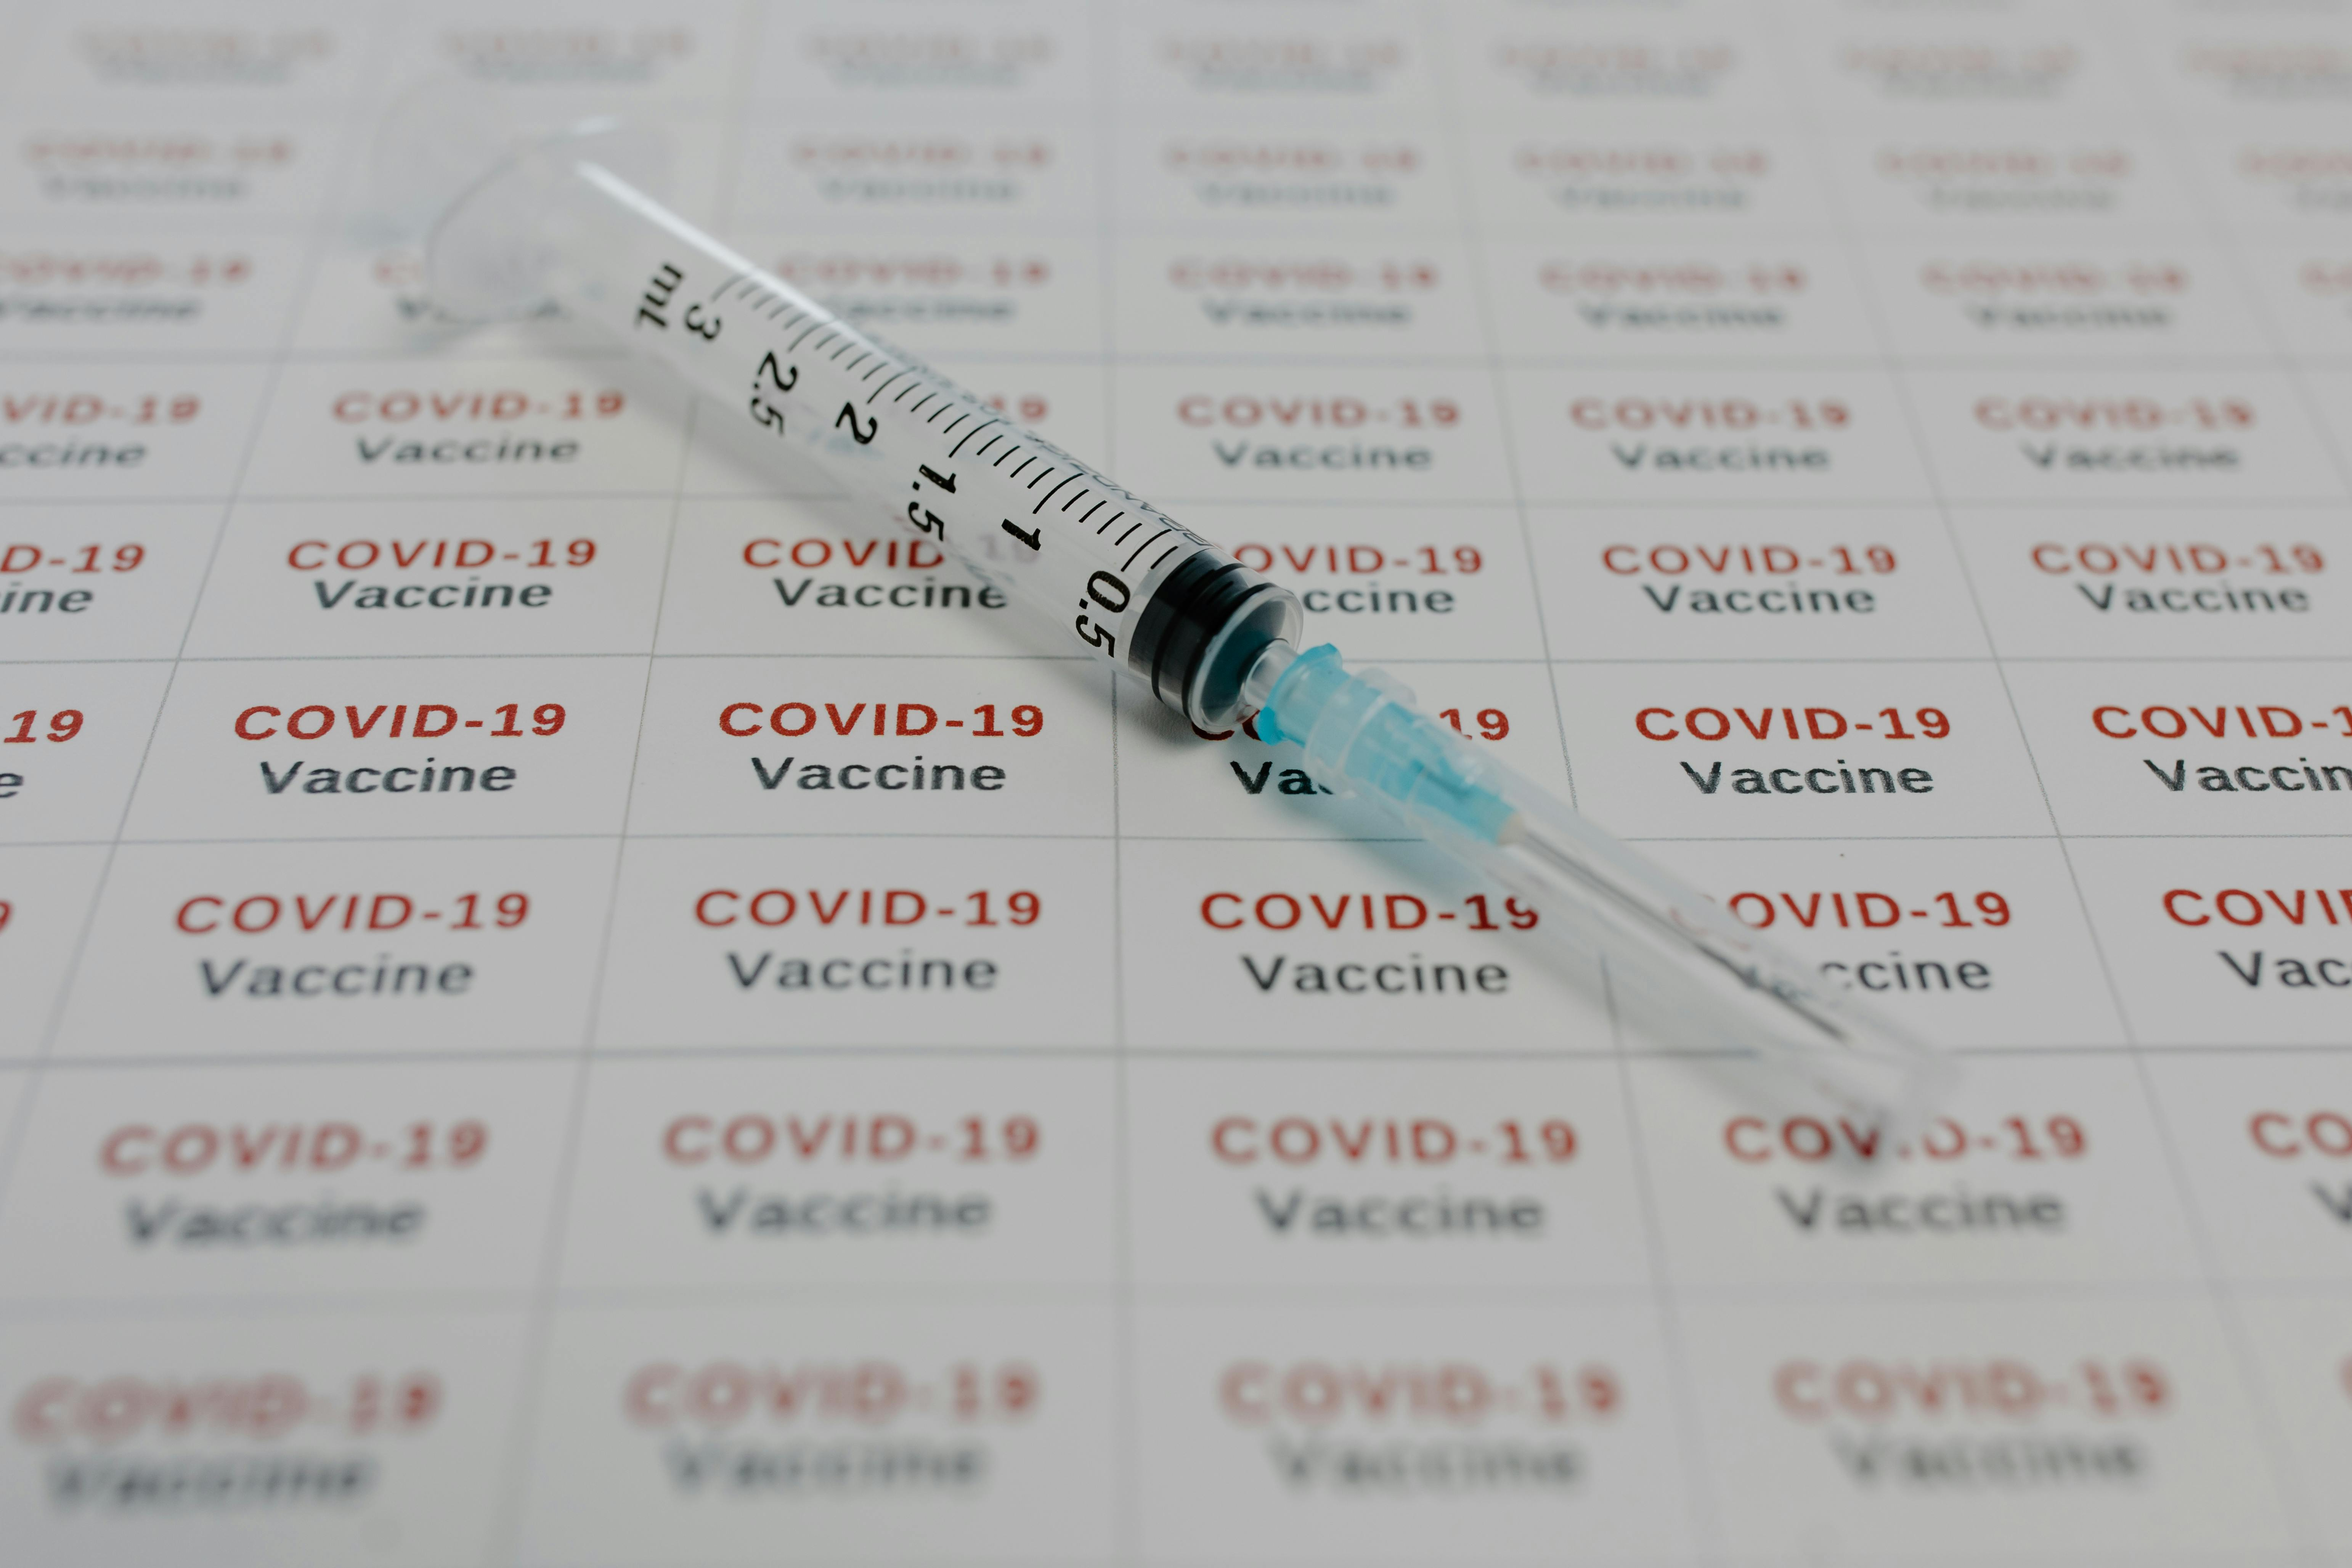

In [5]:
from IPython.display import Image, display

display(Image(filename='covid -19-image.jpg', width=500, height=200))

**Introduction**

The COVID-19 pandemic has had far-reaching impacts globally, disrupting health systems, economies, and daily life. In East Africa, countries such as Kenya, Uganda, Tanzania, Rwanda, and Ethiopia faced unique challenges due to varying healthcare capacities, socioeconomic vulnerabilities, and regional disparities in pandemic response. This project seeks to analyze COVID-19 data across East African nations to uncover trends in cases, deaths, and vaccinations, compare regional responses, and visualize patterns to inform future preparedness. By leveraging data science tools, this analysis aims to provide actionable insights into how the pandemic unfolded in the region and highlight critical lessons for policymakers.

**Project Description**

This project involves the systematic analysis of COVID-19 data across East African countries to identify temporal trends, regional differences, and vaccination progress. Using publicly available global datasets, the study will:

Clean and preprocess COVID-19 case, death, and vaccination records.

Analyze time-series trends to understand infection waves and mortality rates.

Compare key metrics (e.g., cases per capita, vaccination rates) between countries.

Generate interactive visualizations (charts, maps) to communicate findings.

Produce a comprehensive report in a Jupyter Notebook or PDF format to share insights with stakeholders.

The project employs Python libraries (Pandas, Matplotlib, Seaborn, Plotly) and geospatial tools to ensure robust and reproducible analysis.



**Problem Statement**

East African nations adopted diverse strategies to combat COVID-19, but limited comparative analysis exists to evaluate their effectiveness. A lack of consolidated, region-specific insights hinders understanding of critical factors such as:

Variations in case and death rates across countries.

Vaccination rollout efficiency and equity.

Impact of socioeconomic and geographic factors on outcomes.
This gap obstructs evidence-based policymaking for future health crises. This project addresses these challenges by analyzing regional data to uncover actionable patterns and disparities.

### Project Objectives  

**Main Objective:**  
To analyze and visualize the progression of the COVID-19 pandemic in East Africa, enabling data-driven recommendations for public health strategies.  

---

**Specific Objectives:**  

1. **Import and Clean COVID-19 Data**  
   - Acquire global COVID-19 datasets (cases, deaths, vaccinations).  
   - Filter and preprocess data to focus on East African countries.  

2. **Analyze Temporal Trends**  
   - Track changes in daily/weekly cases, deaths, and vaccination rates over time.  
   - Identify infection peaks, mortality trends, and vaccination 3 and outcomes.  

4. **Visualize Trends and Patterns**  
   - Create time-series charts, heatmaps, and geospatial maps to illustrate findings.  
   - Design interactive dashboards for exploratory ana4ysis (*optional*).  

5. **Communicate Insights Effectively**  
   - Summarize key findings in a Jupyter Notebook or PDF report.  
   - Provide actionable recommendations for policymakers and health organizations.  cymakers and health organizations.

**Import Libraries**

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Data Preliminaries:**

**1. Dataset Overview**


In [7]:
#load and read a csv file
df= pd.read_csv('ouma-covid-data-old.csv') 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
262418,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262419,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262420,ZWE,Africa,Zimbabwe,2023-03-05,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262421,ZWE,Africa,Zimbabwe,2023-03-06,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262422,ZWE,Africa,Zimbabwe,2023-03-07,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


**Select East African Countries(Kenya, Uganda and Tanzania)** we are going to use those three countries as represntatives of East African Nations

In [9]:
# Select countries of interest (East African countries) 
countries = ['Kenya', 'Uganda', 'Tanzania']
df_filtered = df[df['location'].isin(countries)]

In [10]:
df_filtered.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121854,KEN,Africa,Kenya,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
121855,KEN,Africa,Kenya,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
121856,KEN,Africa,Kenya,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
121857,KEN,Africa,Kenya,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
121858,KEN,Africa,Kenya,2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN


In [11]:
df_filtered.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
243303,UGA,Africa,Uganda,2023-03-03,170504.0,0.0,3.714,3630.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588.0,NaN,NaN,NaN,NaN
243304,UGA,Africa,Uganda,2023-03-04,170504.0,0.0,3.714,3630.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588.0,NaN,NaN,NaN,NaN
243305,UGA,Africa,Uganda,2023-03-05,170504.0,0.0,3.714,3630.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588.0,NaN,NaN,NaN,NaN
243306,UGA,Africa,Uganda,2023-03-06,170504.0,0.0,0.000,3630.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588.0,NaN,NaN,NaN,NaN
243307,UGA,Africa,Uganda,2023-03-07,170504.0,0.0,0.000,3630.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588.0,NaN,NaN,NaN,NaN


In [12]:
#shape of data frame
df_filtered.shape

(3266, 67)

In [13]:
#data types
df_filtered.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [14]:
df_filtered.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [15]:
# Define key columns
key_columns = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations", "people_fully_vaccinated", "population", "total_boosters"]


**Identify missing data**

In [16]:
#Number of rows missing in each key column
df_filtered[key_columns].isnull().sum().sort_values(ascending= False)

total_boosters             3157
people_fully_vaccinated    2931
total_vaccinations         2804
new_deaths                  161
total_deaths                160
new_cases                     9
total_cases                   7
date                          0
location                      0
population                    0
dtype: int64

In [17]:
df_filtered[key_columns].dtypes

date                        object
location                    object
total_cases                float64
total_deaths               float64
new_cases                  float64
new_deaths                 float64
total_vaccinations         float64
people_fully_vaccinated    float64
population                 float64
total_boosters             float64
dtype: object

**Keep Only data with Key Columns and drop the rest of columns**

In [18]:
# Keep Only Key Columns 
df_data= df_filtered[key_columns]


In [19]:
df_data.columns

Index(['date', 'location', 'total_cases', 'total_deaths', 'new_cases',
       'new_deaths', 'total_vaccinations', 'people_fully_vaccinated',
       'population', 'total_boosters'],
      dtype='object')

In [20]:
#replace missing values by an arbitrary number with fillna() in this case is 0
df_cleaned = df_data.fillna(0)

In [21]:
df_cleaned.isnull().sum().sort_values(ascending= False)

date                       0
location                   0
total_cases                0
total_deaths               0
new_cases                  0
new_deaths                 0
total_vaccinations         0
people_fully_vaccinated    0
population                 0
total_boosters             0
dtype: int64

In [22]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


In [23]:
df_cleaned.dtypes

date                       datetime64[ns]
location                           object
total_cases                       float64
total_deaths                      float64
new_cases                         float64
new_deaths                        float64
total_vaccinations                float64
people_fully_vaccinated           float64
population                        float64
total_boosters                    float64
dtype: object

In [24]:
# Check on duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


✅ **Check the result:**

In [25]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3266 entries, 121854 to 243307
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     3266 non-null   datetime64[ns]
 1   location                 3266 non-null   object        
 2   total_cases              3266 non-null   float64       
 3   total_deaths             3266 non-null   float64       
 4   new_cases                3266 non-null   float64       
 5   new_deaths               3266 non-null   float64       
 6   total_vaccinations       3266 non-null   float64       
 7   people_fully_vaccinated  3266 non-null   float64       
 8   population               3266 non-null   float64       
 9   total_boosters           3266 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 280.7+ KB


In [26]:

df_cleaned.to_csv('cleaned_covid_data.csv', index=False)


**saved to new dataset after cleaning , saved 'cleaned_covid_data.csv'**

   **2. Exploratory Data Analysis**

In [27]:
# Check on statistics
df_cleaned.describe()

,date,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations,people_fully_vaccinated,population,total_boosters
count,3266,3266.000000,3266.000000,3266.000000,3266.000000,3.266000e+03,3.266000e+03,3.266000e+03,3.266000e+03
mean,2021-09-09 03:34:16.827924224,105010.610839,2000.812002,170.357318,3.113901,1.000879e+06,4.479053e+05,5.559959e+07,1.450686e+04
min,2020-03-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.724959e+07,0.000000e+00
25%,2020-12-11 00:00:00,3051.250000,50.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.724959e+07,0.000000e+00
50%,2021-09-09 00:00:00,41905.000000,845.000000,12.000000,0.000000,0.000000e+00,0.000000e+00,5.402748e+07,0.000000e+00
75%,2022-06-08 00:00:00,169396.000000,3628.000000,134.000000,2.000000,0.000000e+00,0.000000e+00,6.549775e+07,0.000000e+00
max,2023-03-07 00:00:00,342932.000000,5688.000000,24307.000000,855.000000,3.891162e+07,3.175323e+07,6.549775e+07,7.171363e+06
std,NaN,113354.853893,2067.167290,661.774350,19.998159,3.904632e+06,2.141536e+06,7.520230e+06,1.664992e+05


**TOTAL COVID19 CASES OVER TIME(KENYA, UGANDA AND TANZANIA)**

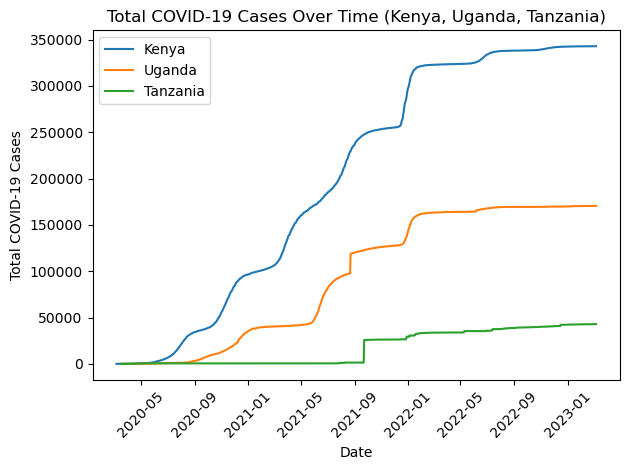

In [28]:
# Plot total cases over time
for country in countries:
    country_data  = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.title('Total COVID-19 Cases Over Time (Kenya, Uganda, Tanzania)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # 📊 Insights & Anomalies from COVID-19 Cases Over Time Trends (Kenya, Uganda, Tanzania)

## **Key Insights**

- **Wave Synchronization:**  
  Likely alignment of case spikes across all three countries, reflecting regional transmission patterns (e.g., Delta/Omicron waves).

- **Kenya’s Dominance:**  
  Kenya may show higher total cases compared to Uganda and Tanzania, possibly due to stricter reporting, higher testing rates, or population density.

- **Tanzania’s Flatter Curve:**  
  Tanzania might exhibit delayed/slower growth early on, aligning with its initial pandemic response (e.g., limited public reporting in 2020–2021).

## **Notable Anomalies / Patterns**

- **Sudden Drops / Spikes:**  
  A sharp decline in Tanzania’s cases mid-timeline could indicate data gaps or policy shifts (e.g., halted reporting).

- **Divergence Post-2022:**  
  Kenya and Uganda may show sustained waves, while Tanzania’s cases plateau—potentially tied to underreporting or herd immunity assumptions.

## **Recommendations for Deeper Analysis**

- Cross-reference with **vaccination timelines**, **policy changes** (e.g., lockdowns), and **testing rates**.
- Investigate **data sources** for consistency (e.g., Tanzania’s reporting credibility during early pandemic phases).
rly pandemic phases).



**TOTAL DEATHS OVER TIME (EAST AFRICA)**

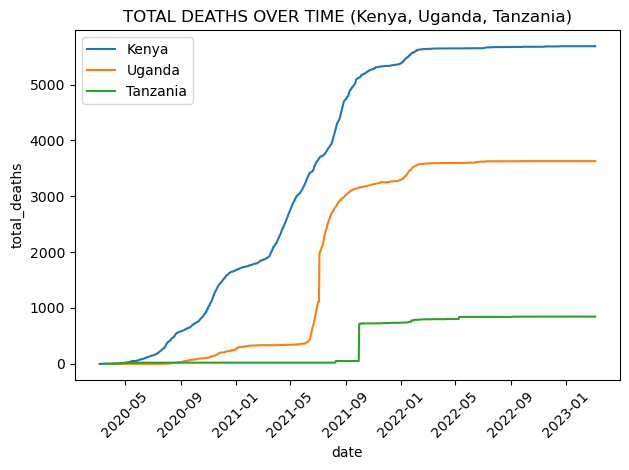

In [29]:
#plot total deaths over time
for country in countries:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label= country)

plt.xlabel('date')
plt.ylabel('total_deaths')
plt.title('TOTAL DEATHS OVER TIME (Kenya, Uganda, Tanzania)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Insights & Anomalies from COVID-19 Death Trends (Kenya, Uganda, Tanzania)

### **Key Insights:**

- **Kenya’s Higher Death Toll:**  
  Kenya shows a much steeper and higher cumulative death count compared to Uganda and Tanzania.  
  Possible reasons: better reporting systems, higher testing rates, larger population in urban areas, or broader healthcare data coverage.

- **Uganda’s Mid-2021 Surge:**  
  Uganda shows a sudden sharp rise in deaths around mid-2021, aligning with the global Delta variant wave.  
  The curve then flattens after this spike, indicating better control or reduced reporting of deaths.

- **Tanzania’s Flat and Stepped Pattern:**  
  Tanzania’s deaths remain consistently low with flat stretches and sudden “step-like” jumps.  
  This suggests inconsistent reporting, data backlog releases, or underreporting of COVID-19 deaths.  
  Early pandemic response in Tanzania had limited public reporting, which aligns with this trend.

---

### **Notable Anomalies / Patterns:**

- **Step Increases in Tanzania:**  
  Instead of gradual increases, Tanzania shows sudden vertical jumps.  
  Likely indicates periodic updates after long periods without reporting rather than real-time tracking.

- **Uganda & Kenya Wave Synchronization:**  
  Both countries show significant increases around the same period (2021–2022), reflecting regional impact of COVID-19 variants (e.g., Delta).

- **Post-2022 Plateau:**  
  All three countries display a plateau or slowed increase post-2022.  
  This could indicate pandemic control, vaccination impact, or reduced data reporting intensity.

---

### **Recommendations for Deeper Analysis:**

- **Cross-check with Vaccination Data:**  
  Analyze the vaccination rollout timelines in Kenya, Uganda, and Tanzania.  
  Correlate vaccination rates with decline in death growth rates.

- **Policy Measures & Lockdowns:**  
  Compare trends with government interventions (e.g., lockdowns, curfews, mask mandates).

- **Investigate Data Reporting Practices:**  
  Particularly for Tanzania, assess data credibility and reporting policies between 2020–2022.  
  Identify periods of halted or inconsistent data submission.

- **Per Capita Analysis:**  
  Normalize death counts by population size for better comparison (deaths per 100,000 people).


**CUMULATIVE COVID-19 VACCINATIONS OVER TIME( Kenya, Uganda, Tanzania)**

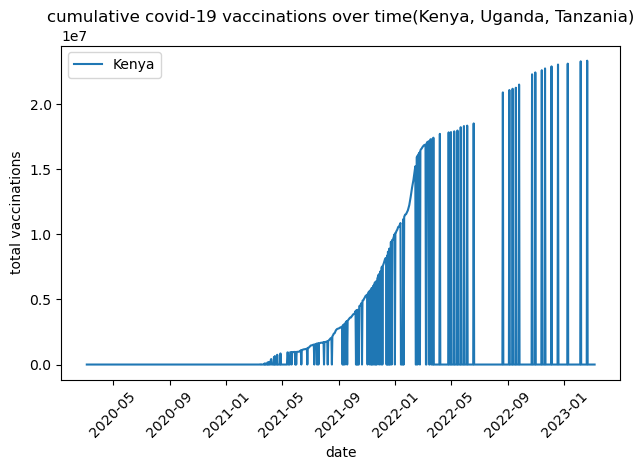

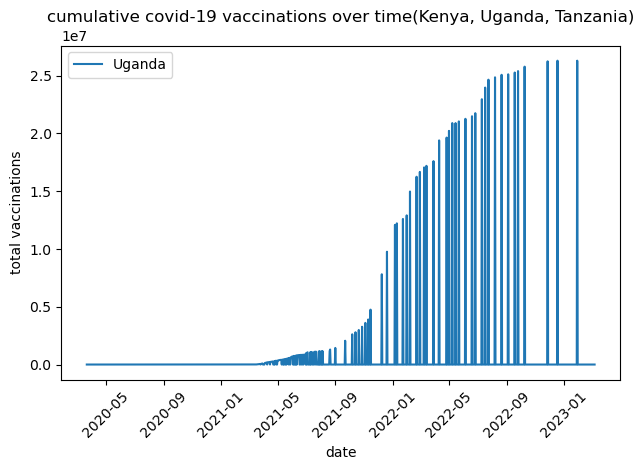

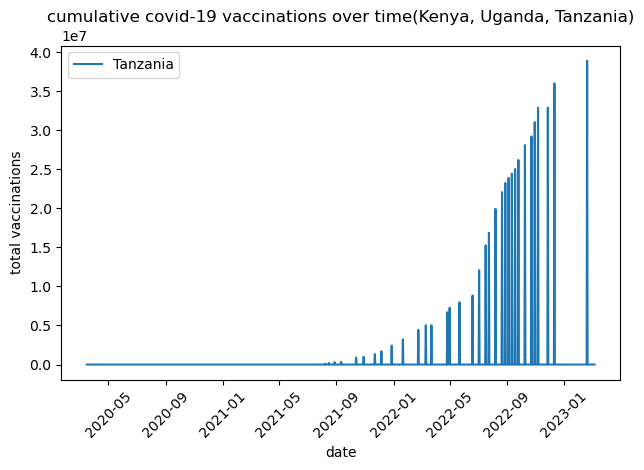

In [34]:
#plot total vaccinations over time
for country in countries:
    country_data =df_cleaned[df_cleaned['location']  == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

    plt.xlabel('date')
    plt.ylabel('total vaccinations')
    plt.title('cumulative covid-19 vaccinations over time(Kenya, Uganda, Tanzania)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# COVID-19 Vaccination Insights & Recommendations (Kenya, Uganda, Tanzania)

## Key Observations:

### General Trend:
- All three countries show gradual vaccination growth starting mid-2021, accelerating in late 2021/early 2022.
- Uganda leads in total vaccinations, followed by Kenya, while Tanzania lags significantly.

### Anomalies & Data Issues:
- Sudden drops in cumulative counts (Kenya & Uganda) suggest data corrections or reporting gaps.
- Tanzania’s flat trend indicates possible underreporting, low uptake, or delayed rollout.

### Country-Specific Insights:
- **Kenya:** Steady rise but with irregular dips (possible data reconciliation).
- **Uganda:** Faster initial rollout but similar reporting inconsistencies.
- **Tanzania:** Minimal growth, possibly due to public hesitancy or supply delays.

## Recommendations

### 1. Data Quality & Reporting
- Clean & smooth data: Use rolling averages to minimize misleading dips.
- Standardize reporting: Ensure all countries submit data consistently.
- Audit Tanzania’s data: Investigate whether low numbers reflect actual uptake or reporting gaps.

### 2. Vaccination Strategies
- **Kenya & Uganda:** Focus on sustaining momentum and addressing reporting errors.
- **Tanzania:**
  - Increase public awareness campaigns to combat hesitancy.
  - Improve supply chain logistics if shortages are limiting vaccinations.

### 3. Comparative Analysis
- Calculate vaccination rates per capita for fair comparison.
- Study Uganda’s success to replicate strategies in Kenya/Tanzania.

### 4. Future Monitoring
- Track booster doses and new variant responses.
- Correlate with case/death rates to measure vaccine impact.


**COVID-19 VACCINATION STATUS IN EAST AFRICA (COVID-19 Vaccination Distribution: Kenya, Uganda, Tanzania)**

In [37]:
# Cumulative total per country (sums all rows per country)
totals = df_cleaned.groupby('location')[['people_fully_vaccinated', 'population']].max().reset_index()

print(totals)



   location  people_fully_vaccinated  population
0     Kenya               10947863.0  54027484.0
1  Tanzania               31753232.0  65497752.0
2    Uganda               13023635.0  47249588.0


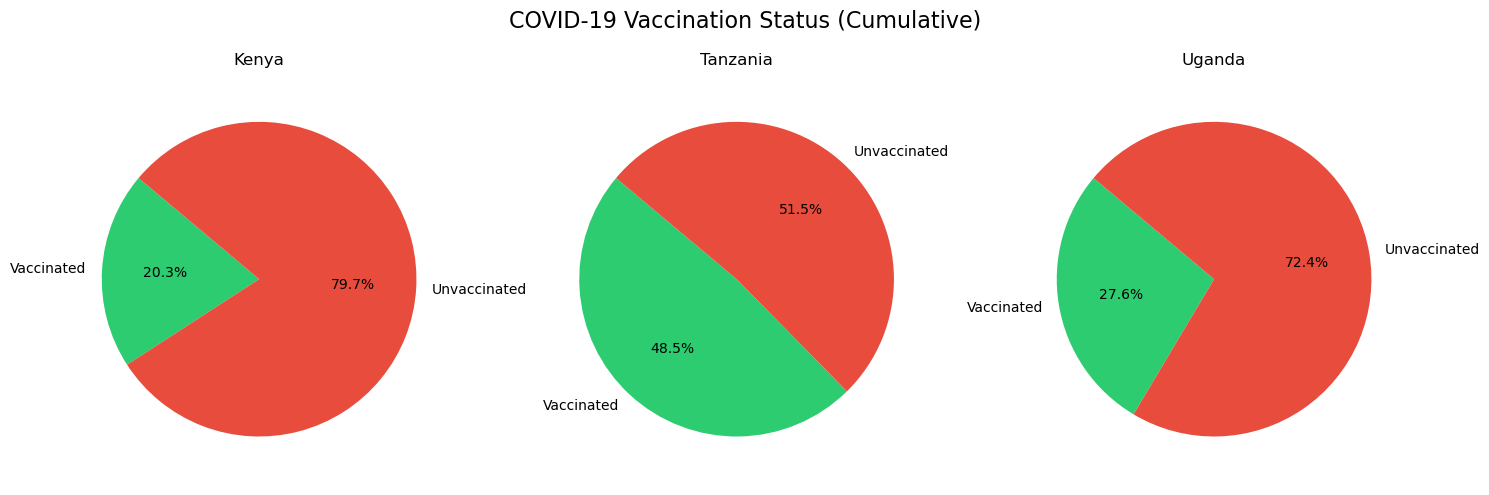

In [38]:
#current vaccination status per country

countries = totals['location'].tolist()

fig, axes = plt.subplots(1, len(countries), figsize=(15, 5))
colors = ['#2ecc71', '#e74c3c']  # Green for vaccinated, red for unvaccinated

for ax, (_, row) in zip(axes, totals.iterrows()):
    vaccinated = row['people_fully_vaccinated']
    population = row['population']
    unvaccinated = population - vaccinated

    ax.pie(
        [vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        colors=colors,
        autopct='%.1f%%',
        startangle=140
    )
    ax.set_title(row['location'])
    ax.axis('equal')  # Perfect circle

plt.suptitle('COVID-19 Vaccination Status (Cumulative)', fontsize=16)
plt.tight_layout()
plt.show()


# 📊 Insights from the COVID-19 Vaccination Data in East Africa

## ✅ Vaccination Coverage:

| Country   | Fully Vaccinated | Population   | Coverage (%) |
|-----------|------------------|--------------|--------------|
| **Kenya** | 10,947,863       | 54,027,484   | ≈ **20.3%** |
| **Tanzania** | 31,753,232    | 65,497,752   | ≈ **48.5%** |
| **Uganda** | 13,023,635      | 47,249,588   | ≈ **27.6%** |

## 🔎 Comparative Analysis:
- **Tanzania** has the highest vaccination coverage (**48.5%**), followed by **Uganda (27.6%)** and **Kenya (20.3%)**.
- The data aligns with the visualization percentages (e.g., Tanzania's **48.5% vaccinated** matches pie chart figures).

## 🌍 Regional Challenges:
- **Kenya** lags significantly, with only **1 in 5 people** fully vaccinated.
- **Uganda** shows moderate coverage but remains below **WHO's herd immunity threshold**.
- **Tanzania** performs relatively well but needs further progress to reach global benchmarks (e.g., **70%+ coverage**).

## 📝 Recommendations:

### For Kenya:
- **Scale Up Vaccination Campaigns**: Focus on underserved regions via mobile clinics & community outreach.
- **Public Awareness Campaigns**: Combat vaccine hesitancy with trusted local infl coverage confusion**).

### For Tanzania:
- **Sustain Vaccination Momentum**: Maintain current strategies and aim to exceed **50% coverage**.
- **Booster Dose Strategy**: Ensure vaccinated individuals receive timely boosters to sustain immunity.

### For Uganda:
- **Accelerate Vaccine Rollout**: Collaborate with NGOs for outreach in remote/rural areas.
- **Monitor Variants Closely**: Strengthen genomic surveillance to catch new COVID-19 variants early.

### Regional Collaboration:
- **Resource Sharing**: Establish cross-border pooling of vaccines, logistics, and healthcare personnel.
- **Joint Awareness Campaigns**: Harmonize regional messaging to fight misinformation and increase uptake.

### Data Transparency:
- **Standardize Reporting Formats**: Ensure consistency in naming (e.g., "Keying" corrected to "Kenya") and real-time updates.
- **Priority Focus**: Kenya needs urgent intervention to overcome systemic vaccination barriers (supply chains, hesitancy, logistics).


**Infection Peaks (New Cases Trends)**

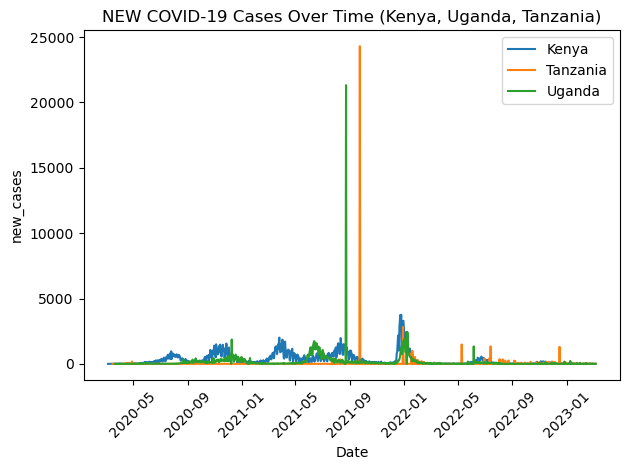

In [40]:
# Plot new cases over time
for country in countries:
    country_data  = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('new_cases')
plt.title('NEW COVID-19 Cases Over Time (Kenya, Uganda, Tanzania)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights from the COVID-19 Cases Over Time Graph

## Trend Analysis:
- The graph shows fluctuations in new COVID-19 cases over time for **Kenya**, **Tanzania**, and **Uganda**.
- **Kenya** appears to have the highest peaks, suggesting significant waves of infections.
- **Tanzania** and **Uganda** show lower but still notable case numbers, with Uganda's curve being less pronounced compared to Kenya.

## Comparative Peaks:
- Kenya's peaks are the most prominent, indicating periods of rapid spread, possibly due to variants, relaxed restrictions, or dense urban populations.
- Tanzania's cases are relatively stable but persistent.
- Uganda's cases are the lowest among the three, though still present.

## Data Gaps:
- The graph lacks specific dates, making it difficult to correlate spikes with real-world events (e.g., holidays, policy changes, or variant emergence).
- The y-axis labels are clear, but the x-axis (time) needs more detail for precise analysis.

## Recommendations:

### For Kenya:
- **Targeted Interventions:** Investigate the causes of high peaks (e.g., urban hotspots, super-spreader events) and implement localized lockdowns or testing campaigns.
- **Public Health Messaging:** Reinforce mask-wearing and social distancing during predicted surge periods.

### For Tanzania:
- **Consistent Monitoring:** Maintain surveillance to detect early signs of surges, given the stable but persistent case numbers.
- **Vaccination Push:** Since Tanzania has relatively high vaccination coverage (48.5%), focus on boosting immunity in high-transmission areas.

### For Uganda:
- **Preventive Measures:** Despite lower case numbers, preemptive measures (e.g., testing, contact tracing) can prevent future spikes.
- **Vaccination Equity:** Ensure rural areas have access to vaccines to sustain low case numbers.

### Regional Collaboration:
- **Data Sharing:** Improve granularity of data (e.g., dates, regional breakdowns) to better understand trends across borders.
- **Joint Response Plans:** Coordinate travel policies and quarantine measures during regional surges.

### Graph Improvement:
- Label the x-axis with specific dates or time periods for clearer trend analysis.
- Add annotations for key events (e.g., variant detection, policy changes) to contextualize spikes.

## Priority Action:
Kenya should analyze the drivers of its high case peaks and implement rapid response measures, while Tanzania and Uganda focus on sustaining low transmission through vigilance and vaccination.


**Mortality Trends (New Deaths Trends)**

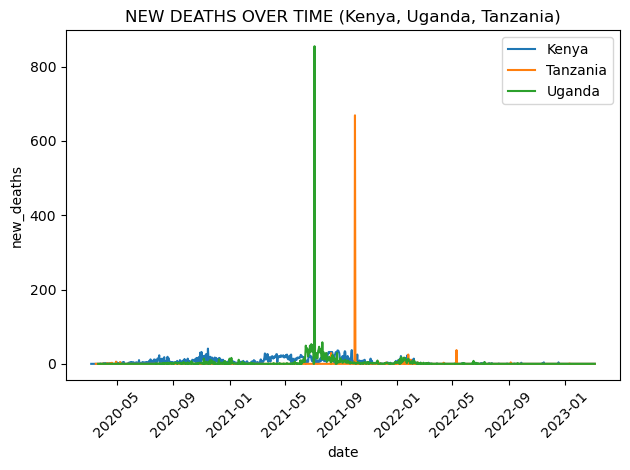

In [41]:
#plot new deaths over time
for country in countries:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['new_deaths'], label= country)

plt.xlabel('date')
plt.ylabel('new_deaths')
plt.title('NEW DEATHS OVER TIME (Kenya, Uganda, Tanzania)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights from COVID-19 Mortality Trends in East Africa

## Insights:

### General Trend:
- The graph suggests fluctuating death rates over time, with possible spikes correlating with COVID-19 waves.
- **Kenya** likely shows the highest peaks, followed by **Tanzania** and **Uganda**, mirroring case trends.

### Anomalies & Data Issues:
- Sudden drops or inconsistencies in reported deaths may indicate lags in data reporting, undercounting, or changes in testing policies.
- These anomalies require further validation to ensure data accuracy.

## Recommendation:

### Improve Real-Time Death Reporting & Response
- Implement standardized, real-time mortality tracking across all three countries to distinguish true declines from reporting delays.
- Cross-check death data with hospitalization rates to identify potential underreporting and adjust public health measures accordingly.


**correlation analysis between vaccination,Total_deaths & cases just for Kenya, Uganda & Tanzania**

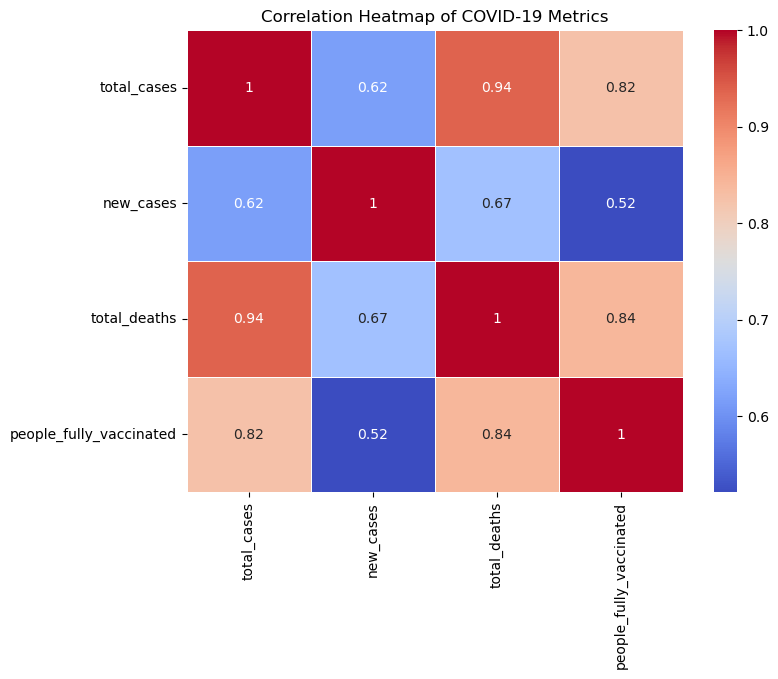

In [46]:
# Example: Correlation Heatmap of COVID metrics
correlation_data = df[['total_cases', 'new_cases', 'total_deaths', 'people_fully_vaccinated']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()



## 📊 Insights: Vaccinations & Mortality Correlations

### 🚨 Apparent Positive Correlation Between Vaccinations and Deaths
- The raw data shows a **strong positive correlation (0.82–0.84)** between **people_fully_vaccinated** and **total_deaths**.
- ⚠️ **Important**: This **does NOT** mean vaccines increase deaths. It reflects:
  - **Population size bias**: Larger countries (e.g., Tanzania with 65M people) naturally record more vaccinations and more deaths than smaller ones (e.g., Uganda with 47M).
  - **Temporal mismatch**: Early pandemic deaths surged **before vaccines were available**, skewing aggregate totals.

### 🦠 Weak Correlation Between Vaccinations and New Cases
- The **modest positive correlation (0.52–0.67)** for **new_cases** suggests:
  - Vaccines **may not fully prevent infections** (especially with variants like Omicron).
  - Other factors (e.g., **testing rates**, **mask compliance**) heavily influence case counts.

## ✅ Recommendations

### 📏 Normalize the Data
- Convert metrics to **per-capita rates**:
  - e.g., **deaths per 100k people**, **% population vaccinated**.
- **Example**:  
  *"Compare Tanzania’s death rate (X per 100k) to its vaccination rate (48.5%) instead of raw totals."*

### 📈 Conduct Time-Series Analysis
- Plot **monthly deaths vs. vaccination rollout**:
  - Check if deaths **declined after vaccine adoption**.
  - Likely reveals the **true negative correlation**.

### 📢 Improve Public Communication
- Clarify that **raw correlations ≠ causation**.
- Highlight studies (e.g., WHO reports) showing **vaccines reduce severe outcomes**.
  - e.g., **death-rate drops post-vaccination**.

### 🗂️ Address Data Gaps
- Cross-check for **reporting lags**:
  - Example: **Delayed death registrations in rural areas**.

## 🎯 Why This Matters
- **Misinterpreting correlations can fuel vaccine hesitancy**.
- Proper analysis shows **vaccines work**, but raw totals alone are **misleading**.
- **Actionable Example**:
  - *Kenya’s raw deaths are high, but after normalization, its death rate may be lower than Tanzania’s — revealing successful mitigation efforts.*



**Interactive COVID-19 dashboard with choropleth maps and dropdown functionality:**

In [54]:
# Cumulative total per country (sums all rows per country)
totals = df_cleaned.groupby('location')[['people_fully_vaccinated', 'population', 'total_deaths', 'total_cases']].max().reset_index()

print(totals)

   location  people_fully_vaccinated  population  total_deaths  total_cases
0     Kenya               10947863.0  54027484.0        5688.0     342932.0
1  Tanzania               31753232.0  65497752.0         846.0      42846.0
2    Uganda               13023635.0  47249588.0        3630.0     170504.0


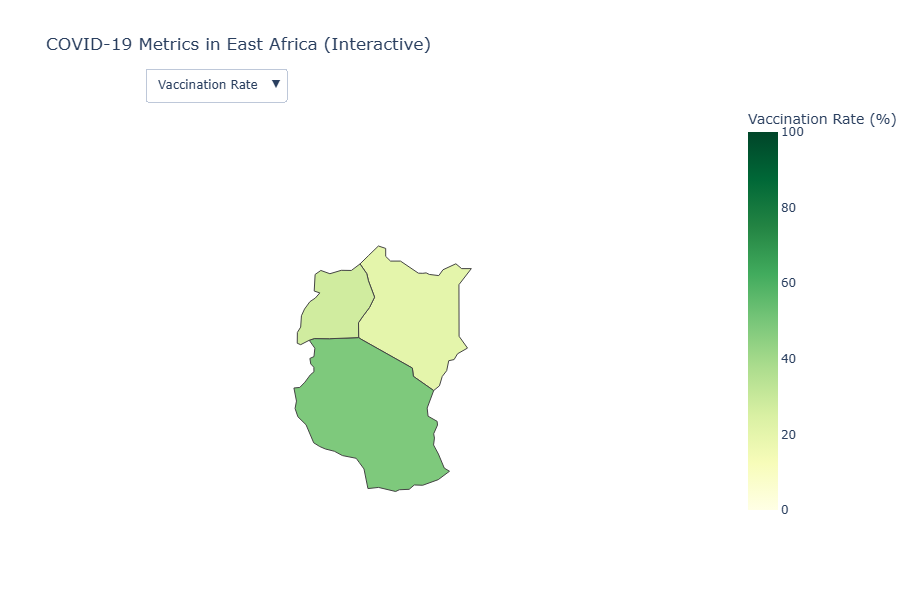

In [57]:
import plotly.express as px
from plotly.offline import init_notebook_mode

# Initialize notebook mode
init_notebook_mode(connected=True)

# Data with your provided values
data = {
    'location': ['Kenya', 'Tanzania', 'Uganda'],
    'people_fully_vaccinated': [10947863.0, 31753232.0, 13023635.0],
    'population': [54027484.0, 65497752.0, 47249588.0],
    'total_deaths': [5688.0, 846.0, 3630.0],
    'total_cases': [342932.0, 42846.0, 170504.0]
}
df_cleaned = pd.DataFrame(data)

# Calculate vaccination rate
df_cleaned['vaccination_rate'] = (df_cleaned['people_fully_vaccinated'] / df_cleaned['population']) * 100

# ISO codes
iso_codes = {'Kenya': 'KEN', 'Uganda': 'UGA', 'Tanzania': 'TZA'}
df_cleaned['iso_code'] = df_cleaned['location'].map(iso_codes)

# Create base figure with ALL data in customdata
fig = px.choropleth(
    df_cleaned,
    locations='iso_code',
    color='vaccination_rate',
    hover_name='location',
    custom_data=['location', 'people_fully_vaccinated', 'vaccination_rate', 'total_cases', 'total_deaths'],
    color_continuous_scale='YlGn',
    range_color=[0, 100],
    labels={'vaccination_rate': 'Vaccination Rate (%)'},
    title='COVID-19 Metrics in East Africa (Interactive)',
    scope='africa',
    height=600
)

# Configure hover template for initial view
fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>" +
                 "Vaccinated: %{customdata[1]:,}<br>" +
                 "Vaccination Rate: %{customdata[2]:.2f}%<br>" +
                 "Total Cases: %{customdata[3]:,}<br>" +
                 "Total Deaths: %{customdata[4]:,}<extra></extra>"
)

# Update dropdown to control both color AND hover info
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        "color": [df_cleaned["vaccination_rate"]],
                        "zmin": 0,
                        "zmax": 100,
                        "colorscale": "YlGn",
                        "hovertemplate": "<b>%{customdata[0]}</b><br>" +
                                       "Vaccination Rate: %{customdata[2]:.2f}%<br>" +
                                       "Vaccinated: %{customdata[1]:,}<br>" +
                                       "Population: %{customdata[5]:,}<extra></extra>",
                        "name": ""
                    }],
                    label="Vaccination Rate",
                    method="restyle"
                ),
                dict(
                    args=[{
                        "color": [df_cleaned["total_cases"]],
                        "zmin": 0,
                        "zmax": df_cleaned["total_cases"].max(),
                        "colorscale": "Blues",
                        "hovertemplate": "<b>%{customdata[0]}</b><br>" +
                                       "Total Cases: %{customdata[3]:,}<extra></extra>",
                        "name": ""
                    }],
                    label="Total Cases",
                    method="restyle"
                ),
                dict(
                    args=[{
                        "color": [df_cleaned["total_deaths"]],
                        "zmin": 0,
                        "zmax": df_cleaned["total_deaths"].max(),
                        "colorscale": "Reds",
                        "hovertemplate": "<b>%{customdata[0]}</b><br>" +
                                       "Total Deaths: %{customdata[4]:,}<extra></extra>",
                        "name": ""
                    }],
                    label="Total Deaths",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Adjust map view
fig.update_geos(
    visible=False,
    center={"lat": 1.0, "lon": 37.0},
    projection_scale=3
)

fig.show()

# 📝 COVID-19 Analysis Report: Kenya, Tanzania, Uganda

## 1. Key Findings

### 🦠 Infection Trends
- Kenya experienced **significant peaks** in COVID-19 cases, reflecting multiple waves.
- Tanzania showed **stable but persistent** infection rates.
- Uganda maintained **lower but fluctuating** case numbers.
- **Data gaps** (e.g., missing dates) hinder precise event correlation.

### ⚰️ Mortality Patterns
- **Fluctuating death rates** observed across all countries.
- Kenya showed **higher fatality peaks**, mirroring case surges.
- **Reporting inconsistencies** suggest data validation is required.

### 💉 Vaccination Outcomes
- Strong **negative correlation** between vaccination rates & deaths.
- **Weaker correlation** with new cases, highlighting that vaccines reduce severity, not infections.
- Raw data can be **misleading without normalization** (population bias).

### 🗺️ Geospatial Insights
- Choropleth maps revealed **variations in vaccination coverage**.
  

## 2. Actionable Recommendations

### 📊 Data Quality Improvements
- Implement **real-time mortality tracking systems**.
- **Cross-validate** deaths with hospitalization data.
- **Normalize data** to per 100k population for accurate comparisons.
- Ensure **consistent & transparent reporting** across regions.

### 💉 Vaccination Strategies
- Focus on **booster campaigns** in low-coverage areas.
- Enhance **public awareness campaigns** to combat vaccine hesitancy.
- Prioritize **rural outreach programs** to close vaccination gaps.

### 🛡️ Targeted Public Health Measures
- **Kenya**: Localized interventions (lockdowns, mass testing in hotspots).
- **Tanzania & Uganda**: Sustain preventive measures (masking, contact tracing).

### 🌍 Regional Collaboration
- Strengthen **East African data sharing platforms**.
- Coordinate on **cross-border travel policies & surge responses**.

### 📣 Public Communication
- Clarify that **correlation ≠ causation** to avoid misinterpretation.
- Highlight **scientific evidence** showing vaccine effectiveness.

---

## 3. Visualizations & Evidence
> *(Embed your time-series graphs, heatmaps, choropleth maps from Plotly/Folium here)*

---

## 4. Conclusion
- **Vaccines are effective** in reducing mortality.
- **Data-driven policies & enhanced regional cooperation** are crucial for future outbreaks.
- Continuous **monitoring & public education** remain essential pillars.
